### PCA (+Python) explanation

In [295]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
sns.set()

### What is a covariance matrix?

Technically, the principal components of a dataset are the eigenvectors of its covariance matrix. A covariance matrix is just a concise way of explaining how two or more features are correlated.

For example, if A and B have a correlation of 0.7, the covariance matrix looks like this:  

```np.array([1, 0.7],[0.7,1]])```

Or 
```
   A.  B.
A. 1   0.7
B. 0.7  1
```

### Project a point to a line

We'll need this to do PCA "manually"

In [296]:
def project_point_to_line(vp,vl):
    
    return (np.dot(vp,vl)/np.dot(vl,vl))*vl

def plot_projection(vp,vl):
    
    plt.plot(np.array([0,vl[0]]),np.array([0,vl[1]]))
    
    projected = project_point_to_line(vp,vl)
    plt.plot([vp[0],projected[0]],[vp[1],projected[1]],'r-')
    plt.plot(vp[0],vp[1],'ko')
    plt.plot(projected[0],projected[1],'ro')
    plt.axis('equal')
    

What does it mean to project a point onto a line? Its just finding the closest point on the line to the point. The line vector connecting this closest point 

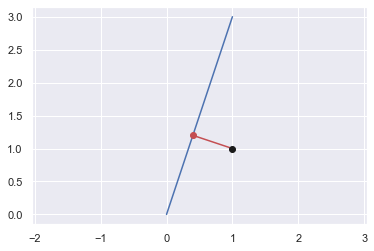

In [297]:
plot_projection(np.array([1,1]),np.array([1,3]))

In [299]:
def generate_sample_data(mean=[0,0],r2=0.8,samples=10000):
    
    """
    Generate a 2D sample dataset
    """
    
    cov = np.array([[1,r2],[r2,1]])
    
    data = np.random.multivariate_normal(mean=mean, cov=cov, size=samples)
    evalues,evecs = np.linalg.eig(cov)
        
    return pd.DataFrame(data,columns=["x","y"]), evalues, evecs
    

In [300]:
def manual_pca_1_comp(x,y,vector):
    
    """
    Do PCA manually by projecting points in a 2D dataset onto an eigenvector of the covariance matrix
    """
    
    p_x = np.empty(len(x))
    p_y = np.empty(len(y))
    
    for i, e in enumerate(zip(x,y)):
        p_x[i], p_y[i] = project_point_to_line(e,vector)
    
    return p_x,p_y
        

### Generate sample data

In [301]:
df, evalues, evecs = generate_sample_data()

In [302]:
df.head(5)

,x,y
0,-1.171611,-1.019514
1,-0.442075,-0.859655
2,1.785195,1.449948
3,-0.871232,-0.650855
4,-1.040620,-0.916509


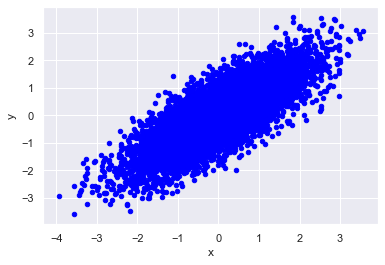

In [303]:
df.plot.scatter(x="x",y="y",c="blue");

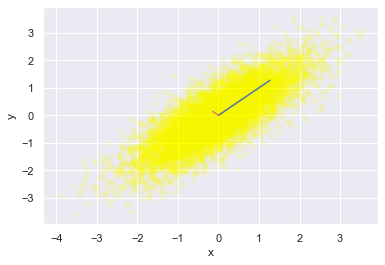

In [304]:
df.plot.scatter(x="x",y="y",c="yellow",alpha=0.1);
plt.plot([0,evalues[0]*evecs[:,0][0]],[0,evalues[0]*evecs[:,0][1]]);
plt.plot([0,evalues[1]*evecs[:,1][0]],[0,evalues[1]*evecs[:,1][1]]);

### Do the PCA manually by projecting

In [306]:
p_x, p_y = manual_pca_1_comp(df["x"].values,df["y"].values,evecs[:,0])
manual_projected_points = -np.sign(p_x)*np.sqrt(p_x**2 + p_y**2)

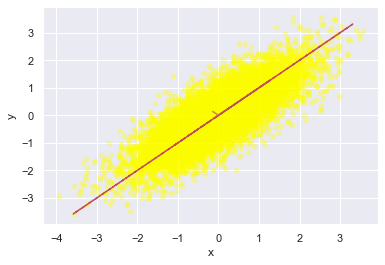

In [317]:
df.plot.scatter(x="x",y="y",c="yellow",alpha=0.3);
plt.plot([0,evalues[0]*evecs[:,0][0]],[0,evalues[0]*evecs[:,0][1]]);
plt.plot([0,evalues[1]*evecs[:,1][0]],[0,evalues[1]*evecs[:,1][1]]);
plt.plot(p_x,p_y,"r--",alpha=1.0);

### Do the PCA with Sklearn

In [307]:
pca = PCA(n_components=1)
transformed = pca.fit_transform(df)

In [308]:
df["sklearn_transformed"] = transformed.reshape(1,-1)[0]
df["manual_transformed"] = manual_projected_points

In [309]:
df.head()

,x,y,sklearn_transformed,manual_transformed
0,-1.171611,-1.019514,1.548629,1.549360
1,-0.442075,-0.859655,0.919633,0.920462
2,1.785195,1.449948,-2.288407,-2.287592
3,-0.871232,-0.650855,1.075558,1.076278
4,-1.040620,-0.916509,1.383163,1.383900


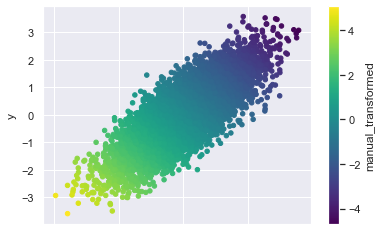

In [316]:
df.plot.scatter(x="x",y="y",c="manual_transformed",cmap="viridis");

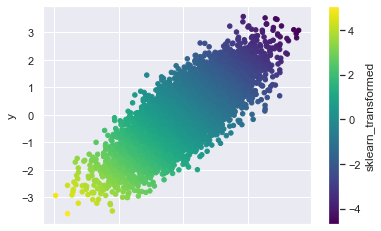

In [315]:
df.plot.scatter(x="x",y="y",c="sklearn_transformed",cmap="viridis");

How much of the variance in the data is explained by this component?

In [321]:
pca.explained_variance_ratio_

array([0.89868084])

This is approximately the same as the ratio between the maximum eigenvalue and the sum of the eigenvalues, as expected

In [323]:
max(evalues)/sum(evalues)

0.9000000000000001

#### How does it work in practice?

We'll look at the famous Iris dataset, which has 4 features - too many to plot together. Its sensible to ask if the data falls into distinct clusters and we can use PCA to help determine this 

In [318]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [328]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [329]:
from sklearn.preprocessing import StandardScaler

In [330]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop("target",axis=1))

In [334]:
pd.DataFrame(scaled_df,columns=df.columns[:4])

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [335]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(scaled_df)

In [338]:
transformed_df = pd.DataFrame(transformed,columns=["comp1","comp2"])
transformed_df["target"] = df["target"]

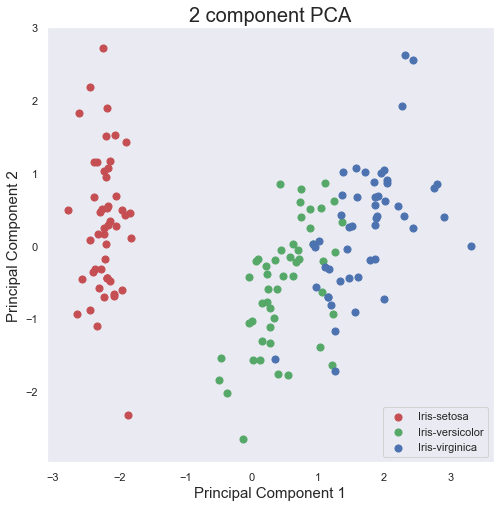

In [339]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = transformed_df['target'] == target
    ax.scatter(transformed_df.loc[indicesToKeep, 'comp1']
               , transformed_df.loc[indicesToKeep, 'comp2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Nice! The PCA shows that the data falls into fairly distinct clusters. Its easier to run a clustering algorithm on this transformed data because of the lower dimensionality and because its easier to see how correct it is. If we get some unknown flower measurements, we can transform them and plot them on a graph like this to easily tell which cluster they are in.